<a href="https://colab.research.google.com/github/louisestella/deepLearning/blob/main/hands_on_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UFRN** - Departamento de Informática e Matemática Aplicada

Inteligência Artificial - **Aprendizado Profundo**

**Disciplina:** DIM0494 - *Tópicos Especiais em Computação XV*

**Professor:** Ranniery Maia

**Aluna:** Louise Stella Lima Barbosa

# Tarefa  - Hands on KERAS

In [1]:
# load libraries
from sklearn.metrics import accuracy_score,classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from tensorflow import keras
from tensorflow.keras import layers



In [2]:
# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()



In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)



# pré-processamento de dados


In [4]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
#print("y_train shape:", y_train.shape)

# Construção do modelo

In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.25),
        #layers.Dense(num_classes, activation="softmax"),
        layers.Dense(1, activation="linear"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

# Treinamento do modelo

In [14]:
# Hyperparameters
batch_size = 128
epochs = 30
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

from sklearn.model_selection import train_test_split

# Separate the test data
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

# model training
history = model.fit(X_train1,
                    y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)



Epoch 1/30
375/375 [==============================] - 3s 5ms/step - loss: 3.8799 - mean_squared_error: 3.8799 - val_loss: 2.0148 - val_mean_squared_error: 2.0148
Epoch 2/30
375/375 [==============================] - 2s 4ms/step - loss: 1.9104 - mean_squared_error: 1.9104 - val_loss: 1.6339 - val_mean_squared_error: 1.6339
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 1.6260 - mean_squared_error: 1.6260 - val_loss: 1.3772 - val_mean_squared_error: 1.3772
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 1.4637 - mean_squared_error: 1.4637 - val_loss: 1.2183 - val_mean_squared_error: 1.2183
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 1.3519 - mean_squared_error: 1.3519 - val_loss: 1.1925 - val_mean_squared_error: 1.1925
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 1.2774 - mean_squared_error: 1.2774 - val_loss: 1.0876 - val_mean_squared_error: 1.0876
Epoch 7/30
375/375 [========

# Avaliação do modelo

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
#print("Test accuracy:", score[1])

Test loss: 0.6886207461357117


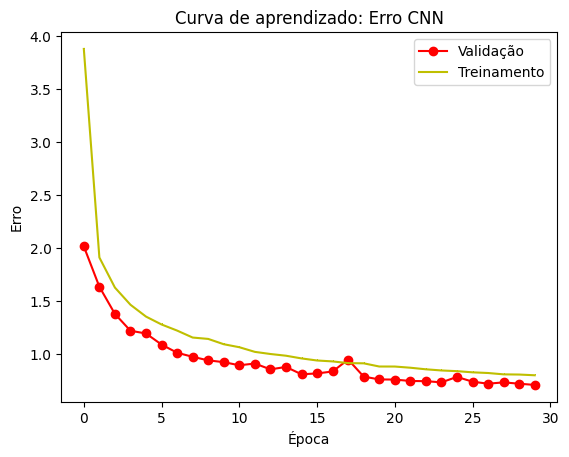

In [16]:
plt.figure()
plt.plot(history.epoch, history.history['val_loss'], 'o-r', label="Validação")
plt.plot(history.epoch, history.history['loss'],',-y', label="Treinamento")
plt.title("Curva de aprendizado: Erro CNN")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()

"""plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], 'o-r', label="Validação")
plt.plot(history.epoch, history.history['accuracy'],',-y', label="Treinamento")
plt.title("Curva de aprendizado: Erro CNN")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()"""

plt.show()

In [17]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
predictions[0].shape

(1,)

In [19]:
predictions[0].round().clip(0,9)

array([7.], dtype=float32)